In [1]:
import pandas as pd
from datetime import date
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts1_classified.csv', index_col=[0])
df2 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts2_classified.csv', index_col=[0]) 
df3 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts3_classified.csv', index_col=[0]) 
df4 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts4_classified.csv', index_col=[0]) 
df5 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts5_classified.csv', index_col=[0]) 
df6 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts6_classified.csv', index_col=[0]) 
df7 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts7_classified.csv', index_col=[0])  
df8 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts8_classified.csv', index_col=[0])  
df9 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts9_classified.csv', index_col=[0])  
df10 = pd.read_csv(r'/Users/connorbailey/Documents/KU/Second Year/Thesis/combined_posts10_classified.csv', index_col=[0])  

In [3]:
#stacking each file on top of eachother, dropping NaNs and dropping duplicates
df_combined = pd.concat([df10, df9, df8, df7, df6, df5, df4, df3, df2, df], ignore_index=True, axis=0)

In [4]:
df_combined = df_combined.dropna()
df_combined = df_combined.drop_duplicates()

In [5]:
df_combined['date_of_post'] = pd.to_datetime(df_combined['time_of_post']).dt.date
df_combined['date_of_post'] = pd.to_datetime(df_combined['date_of_post'])
df_combined['date_joined'] = pd.to_datetime(df_combined['date_joined'])
df_combined['join_month'] = df_combined['date_joined'].dt.to_period('M')
df_combined['post_month'] = df_combined['date_of_post'].dt.to_period('M')
df_combined['age'] = (df_combined['date_of_post'] - df_combined['date_joined']).dt.days

#creating cohort dummies (didn't include C10: implied by full row of 0)

df_combined['C1'] = ((df_combined.date_joined >='2017-11-01') & (df_combined.date_joined <='2018-05-17')).astype(int)
df_combined['C2'] = ((df_combined.date_joined >='2018-05-18') & (df_combined.date_joined <='2018-11-24')).astype(int)
df_combined['C3'] = ((df_combined.date_joined >='2018-11-25') & (df_combined.date_joined <='2019-06-03')).astype(int)
df_combined['C4'] = ((df_combined.date_joined >='2019-06-04') & (df_combined.date_joined <='2019-12-11')).astype(int)
df_combined['C5'] = ((df_combined.date_joined >='2019-12-12') & (df_combined.date_joined <='2020-06-19')).astype(int)
df_combined['C6'] = ((df_combined.date_joined >='2020-06-20') & (df_combined.date_joined <='2020-12-27')).astype(int)
df_combined['C7'] = ((df_combined.date_joined >='2020-12-28') & (df_combined.date_joined <='2021-07-06')).astype(int)
df_combined['C8'] = ((df_combined.date_joined >='2021-07-07') & (df_combined.date_joined <='2022-01-13')).astype(int)
df_combined['C9'] = ((df_combined.date_joined >='2022-01-14') & (df_combined.date_joined <='2022-07-23')).astype(int)

print(df_combined.shape)
df_combined.head()


(4512192, 19)


,user_name,thread_name,post_text,time_of_post,date_joined,binary_target,date_of_post,join_month,post_month,age,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,uninstall,LOW INHIB INCEL HERO HAHAHAHAHA\n,i have done similar shit but as extremeonce my...,2018-04-22 03:13:00,2018-01-10,0,2018-04-22,2018-01,2018-04,102,1,0,0,0,0,0,0,0,0
1,Gone Coping,LOW INHIB INCEL HERO HAHAHAHAHA\n,"this is what most incel men do, they just cope...",2018-04-22 03:35:00,2018-01-19,0,2018-04-22,2018-01,2018-04,93,1,0,0,0,0,0,0,0,0
2,Deleted member 279,LOW INHIB INCEL HERO HAHAHAHAHA\n,kek i wish i knew this guy in real life,2018-04-22 03:47:00,2017-11-08,1,2018-04-22,2017-11,2018-04,165,1,0,0,0,0,0,0,0,0
3,The End,LOW INHIB INCEL HERO HAHAHAHAHA\n,more stories please i m interested in how much...,2018-04-22 04:28:00,2018-04-17,0,2018-04-22,2018-04,2018-04,5,1,0,0,0,0,0,0,0,0
4,kaykay,LOW INHIB INCEL HERO HAHAHAHAHA\n,"bff material, keep us updated with some stories",2018-04-22 04:35:00,2018-03-09,0,2018-04-22,2018-03,2018-04,44,1,0,0,0,0,0,0,0,0


In [6]:
df_combined.dtypes

user_name                object
thread_name              object
post_text                object
time_of_post             object
date_joined      datetime64[ns]
binary_target             int64
date_of_post     datetime64[ns]
join_month            period[M]
post_month            period[M]
age                       int64
C1                        int64
C2                        int64
C3                        int64
C4                        int64
C5                        int64
C6                        int64
C7                        int64
C8                        int64
C9                        int64
dtype: object

## Period Effects

- plotting the average incidence of hate speech for each date of the forum's existence

In [7]:
#sorting by date_of_post and calculating the proportion of hate speech for each day
period = df_combined.groupby('date_of_post')['binary_target'].agg(['sum', 'count'])
period['prop'] = period['sum'] / period['count']
period['date'] = period.index
period = period[period['count'] > 100] 
print(period.shape)
period.head()

(1896, 4)


,sum,count,prop,date
date_of_post,,,,
2017-11-07,54,182,0.296703,2017-11-07
2017-11-08,833,3309,0.251738,2017-11-08
2017-11-09,636,2213,0.287393,2017-11-09
2017-11-10,621,2288,0.271416,2017-11-10
2017-11-11,735,2726,0.269626,2017-11-11


Text(0.5, 0, 'Date of Post (Period)')

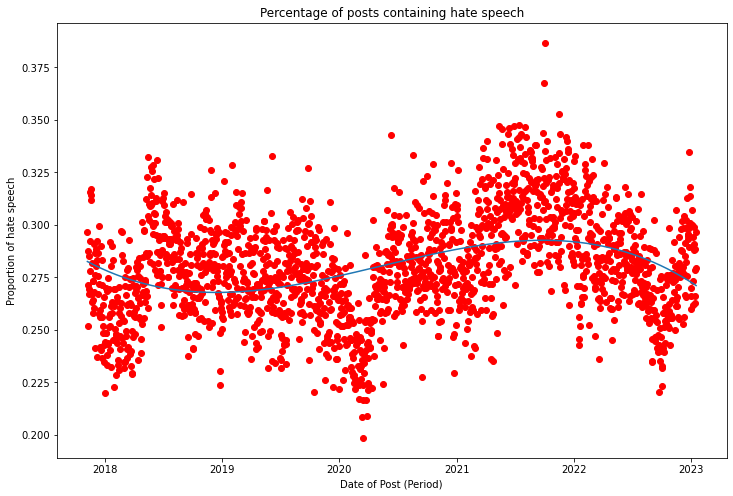

In [8]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_values = period.loc[:, "prop"]
x_values = np.linspace(0,1,len(period.loc[:, "prop"]))
poly_degree = 3

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)

plt.figure(figsize=(12,8))
plt.plot(period.loc[:, "date"], period.loc[:,"prop"], "ro")
plt.plot(period.loc[:, "date"],y_hat)
plt.title('Percentage of posts containing hate speech')
plt.ylabel('Proportion of hate speech')
plt.xlabel('Date of Post (Period)')


- would be interesting to figure out what events are driving these fluctuations (esp beginning of 2020)

In [ ]:
T2021 = period.loc['2020-01-01':'2021-12-31']

Text(0.5, 0, 'Date of Post (Period)')

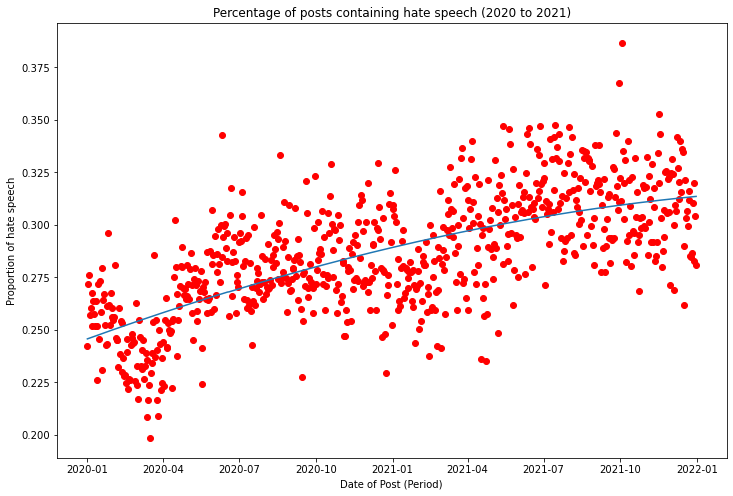

In [48]:
y_values = T2021.loc[:, "prop"]
x_values = np.linspace(0,1,len(T2021.loc[:, "prop"]))
poly_degree = 3

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)

plt.figure(figsize=(12,8))
plt.plot(T2021.loc[:, "date"], T2021.loc[:,"prop"], "ro")
plt.plot(T2021.loc[:, "date"],y_hat)
plt.title('Percentage of posts containing hate speech (2020 to 2021)')
plt.ylabel('Proportion of hate speech')
plt.xlabel('Date of Post (Period)')


## Age Effects

- plotting the average indicence of hate speech for each day of forum membership

In [11]:
age = df_combined.groupby('age')['binary_target'].agg(['sum', 'count'])
age['prop'] = age['sum'] / age['count']
age['date'] = age.index
age = age[age['count'] > 500] 
print(age.shape)
age.head()

(1105, 4)


,sum,count,prop,date
age,,,,
0,11713,42488,0.275678,0
1,16396,57227,0.286508,1
2,12875,45439,0.283347,2
3,11376,39939,0.284834,3
4,10209,36106,0.282751,4


Text(0.5, 0, 'Number of Days As a Forum Member (Age)')

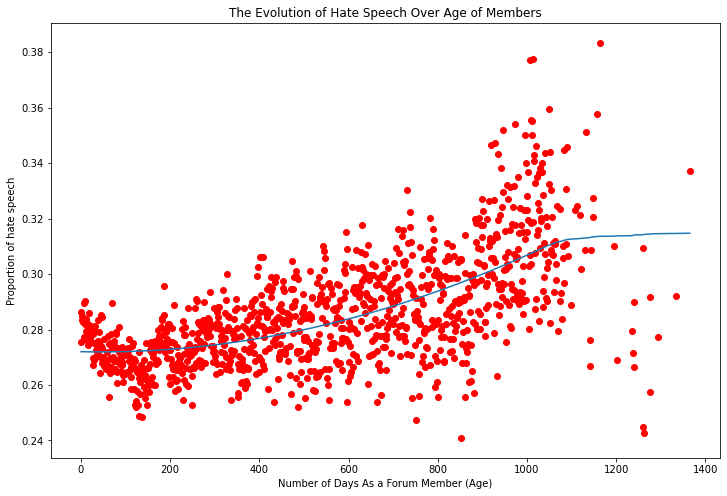

In [12]:
y_values = age.loc[:, "prop"]
x_values = np.linspace(0,1,len(age.loc[:, "prop"]))
poly_degree = 3

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)

plt.figure(figsize=(12,8))
plt.plot(age.loc[:, "date"], age.loc[:,"prop"], "ro")
plt.plot(age.loc[:, "date"],y_hat)
plt.title('The Evolution of Hate Speech Over Age of Members')
plt.ylabel('Proportion of hate speech')
plt.xlabel('Number of Days As a Forum Member (Age)')


The slope is 3.7709860273485465e-05 and the intercept is 0.2647919210379279


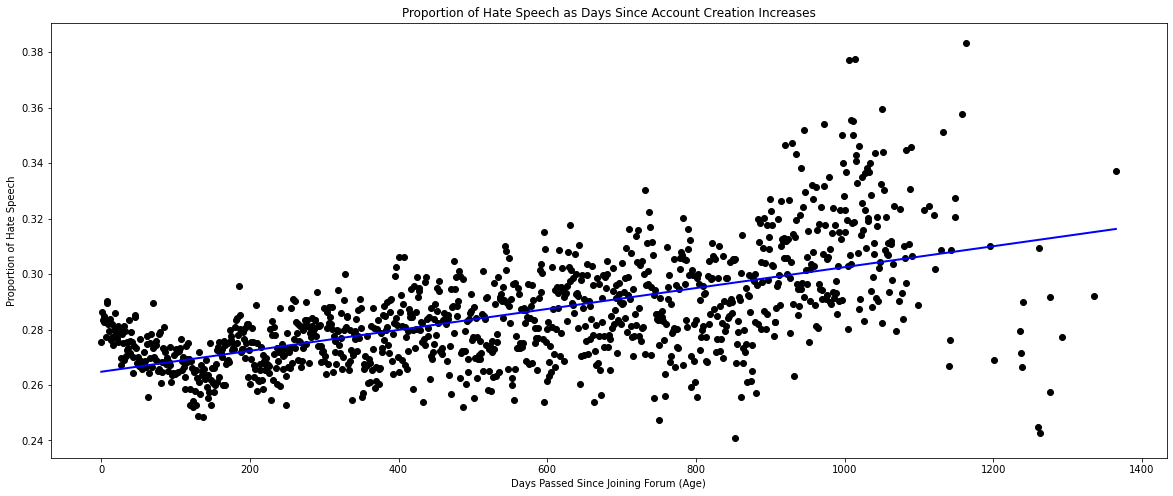

In [14]:
from sklearn.linear_model import LinearRegression

X = age['date'].values[0:].reshape(-1, 1)
y = age['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Proportion of Hate Speech as Days Since Account Creation Increases');
plt.ylabel('Proportion of Hate Speech');
plt.xlabel('Days Passed Since Joining Forum (Age)');
plt.show()

- the longer members spend on the forum, the greater the proportion of posts contain hate speech
- suggests the potential for some form of 'radicalisation' of members

## Cohort Effects

- plotting the average incidence of hate speech for members who join the forum in each month (join in different cohorts)

In [15]:
#sorting by date_joined and calculating the proportion of hate speech for each day
#essentially measuring proportion of hate speech in comments made by members who joined on each day 

cohort = df_combined.groupby('join_month')['binary_target'].agg(['sum', 'count'])
cohort['prop'] = cohort['sum'] / cohort['count']
cohort['date'] = cohort.index
cohort["date"] = cohort["date"].dt.strftime('%Y-%m')
cohort = cohort[cohort['count'] > 10] 
cohort['month'] = range(1, 1+len(cohort))
print(cohort.shape)
cohort.head()

(63, 5)


,sum,count,prop,date,month
join_month,,,,,
2017-11,172603,607792,0.283984,2017-11,1
2017-12,44158,162566,0.271631,2017-12,2
2018-01,44142,151665,0.291049,2018-01,3
2018-02,31047,113405,0.273771,2018-02,4
2018-03,27771,96119,0.288923,2018-03,5


Text(0.5, 0, 'Month Joined (Cohort)')

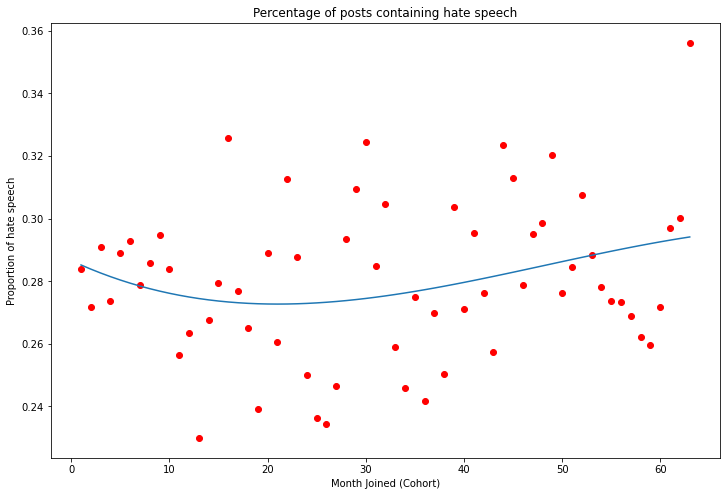

In [18]:
y_values = cohort.loc[:, "prop"]
x_values = np.linspace(0,1,len(cohort.loc[:, "prop"]))
poly_degree = 3

coeffs = np.polyfit(x_values, y_values, poly_degree)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x_values)

plt.figure(figsize=(12,8))
plt.plot(cohort.loc[:, "month"], cohort.loc[:,"prop"], "ro")
plt.plot(cohort.loc[:, "month"],y_hat)
plt.title('Percentage of posts containing hate speech')
plt.ylabel('Proportion of hate speech')
plt.xlabel('Month Joined (Cohort)')


The slope is 0.0002565024012574922 and the intercept is 0.2720552026402712


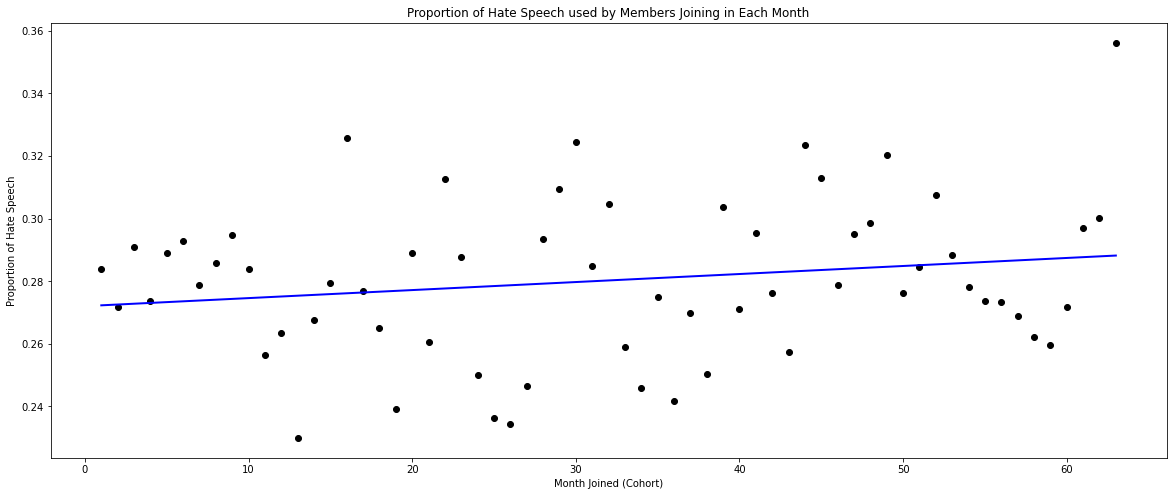

In [17]:
X = cohort['month'].values[0:].reshape(-1, 1)
y = cohort['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Proportion of Hate Speech used by Members Joining in Each Month');
plt.ylabel('Proportion of Hate Speech');
plt.xlabel('Month Joined (Cohort)');
plt.show()


- slight increase in hate speech for newer cohorts but not a lot in it

## Cohorts as They Age (as their time as a member increases)

- plotting, for each cohort (split into 10 roughly 6 month periods from end of 2017 to now), how the prominence of hate speech changes as length of membership increases 

In [37]:
cohort1 = df_combined[df_combined["C1"] == 1]
cohort2 = df_combined[df_combined["C2"] == 1]
cohort3 = df_combined[df_combined["C3"] == 1]
cohort4 = df_combined[df_combined["C4"] == 1]
cohort5 = df_combined[df_combined["C5"] == 1]
cohort6 = df_combined[df_combined["C6"] == 1]
cohort7 = df_combined[df_combined["C7"] == 1]
cohort8 = df_combined[df_combined["C8"] == 1]
cohort9 = df_combined[df_combined["C9"] == 1]

In [41]:
print(cohort1.shape)
print(cohort2.shape)
print(cohort3.shape)
print(cohort4.shape)
print(cohort5.shape)
print(cohort6.shape)
print(cohort7.shape)
print(cohort8.shape)
print(cohort9.shape)

(1447236, 19)
(722315, 19)
(388538, 19)
(506022, 19)
(328836, 19)
(288672, 19)
(200254, 19)
(275840, 19)
(236794, 19)


In [21]:
C11 = cohort1.groupby('age')['binary_target'].agg(['sum', 'count'])
C11['prop'] = C11['sum'] / C11['count']
C11['date'] = C11.index
C11 = C11[C11['count'] > 250] 
C11['age'] = range(1, 1+len(C11))

C22 = cohort2.groupby('age')['binary_target'].agg(['sum', 'count'])
C22['prop'] = C22['sum'] / C22['count']
C22['date'] = C22.index
C22 = C22[C22['count'] > 250] 
C22['age'] = range(1, 1+len(C22))

C33 = cohort3.groupby('age')['binary_target'].agg(['sum', 'count'])
C33['prop'] = C33['sum'] / C33['count']
C33['date'] = C33.index
C33 = C33[C33['count'] > 250] 
C33['age'] = range(1, 1+len(C33))

C44 = cohort4.groupby('age')['binary_target'].agg(['sum', 'count'])
C44['prop'] = C44['sum'] / C44['count']
C44['date'] = C44.index
C44 = C44[C44['count'] > 250] 
C44['age'] = range(1, 1+len(C44))

C55 = cohort5.groupby('age')['binary_target'].agg(['sum', 'count'])
C55['prop'] = C55['sum'] / C55['count']
C55['date'] = C55.index
C55 = C55[C55['count'] > 250] 
C55['age'] = range(1, 1+len(C55))

C66 = cohort6.groupby('age')['binary_target'].agg(['sum', 'count'])
C66['prop'] = C66['sum'] / C66['count']
C66['date'] = C66.index
C66 = C66[C66['count'] > 250] 
C66['age'] = range(1, 1+len(C66))

C77 = cohort7.groupby('age')['binary_target'].agg(['sum', 'count'])
C77['prop'] = C77['sum'] / C77['count']
C77['age'] = C77.index
C77 = C77[C77['count'] > 250] 
C77['age'] = range(1, 1+len(C77))

C88 = cohort8.groupby('age')['binary_target'].agg(['sum', 'count'])
C88['prop'] = C88['sum'] / C88['count']
C88['date'] = C88.index
C88 = C88[C88['count'] > 250] 
C88['age'] = range(1, 1+len(C88))

C99 = cohort9.groupby('age')['binary_target'].agg(['sum', 'count'])
C99['prop'] = C99['sum'] / C99['count']
C99['date'] = C99.index
C99 = C99[C99['count'] > 250] 
C99['age'] = range(1, 1+len(C99))

The slope is 2.1010290858971216e-05 and the intercept is 0.2781440538192233


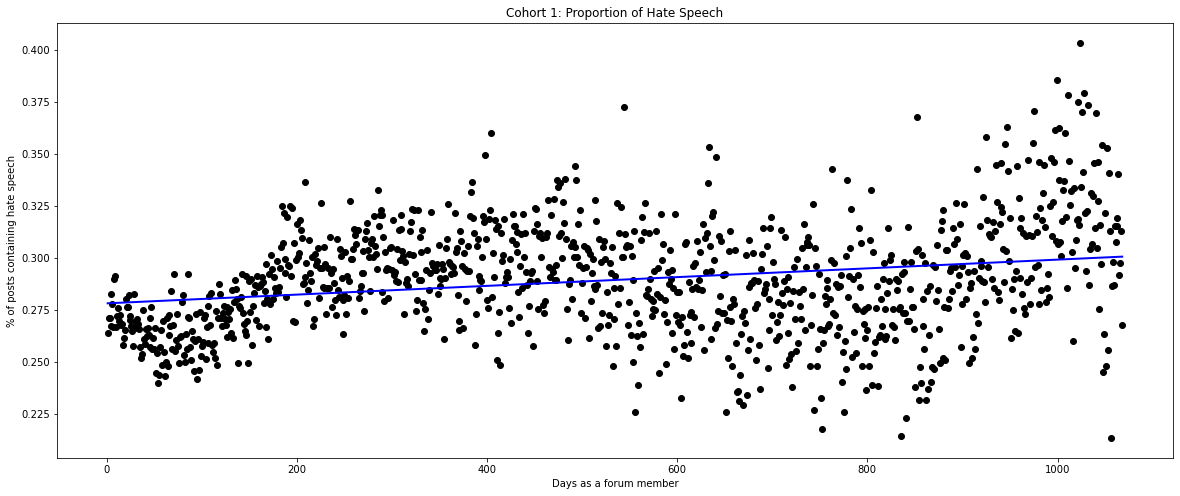

In [22]:
X = C11['age'].values[0:].reshape(-1, 1)
y = C11['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 1: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is 5.364667617607783e-05 and the intercept is 0.25038007591703937


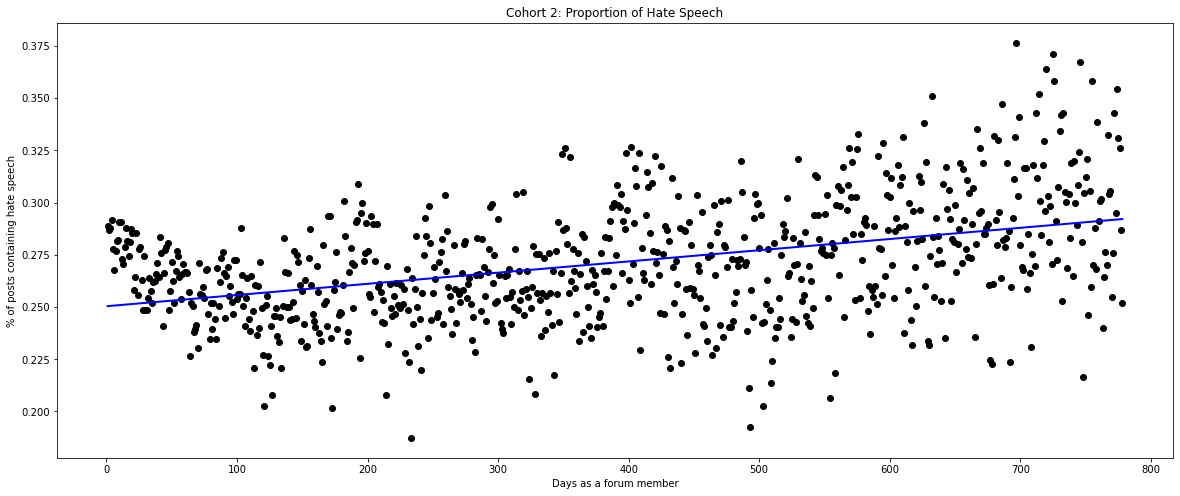

In [23]:
X = C22['age'].values[0:].reshape(-1, 1)
y = C22['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 2: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is -3.586248734426481e-05 and the intercept is 0.26985382710982464


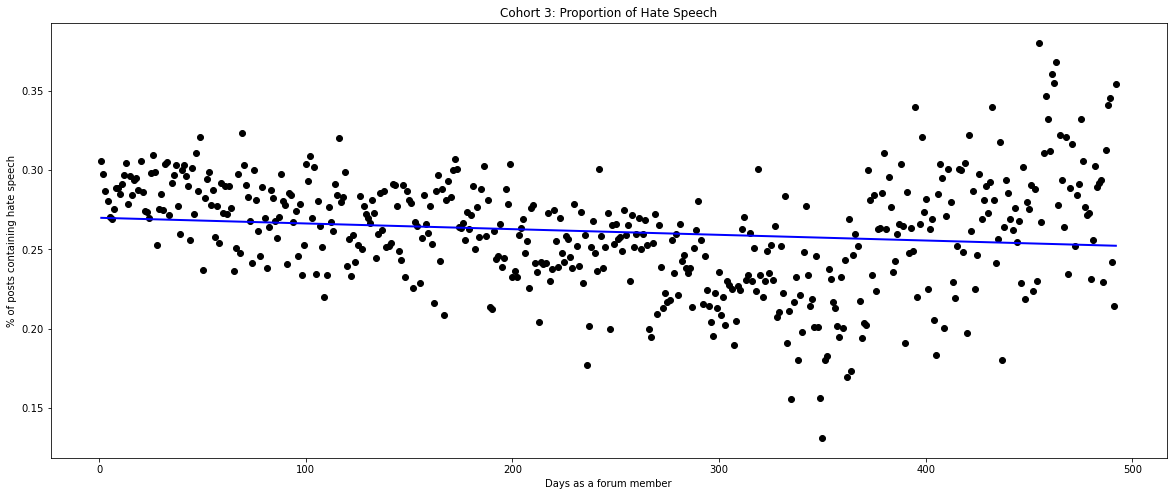

In [24]:
X = C33['age'].values[0:].reshape(-1, 1)
y = C33['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 3: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is 5.875697428321307e-05 and the intercept is 0.2455935958184423


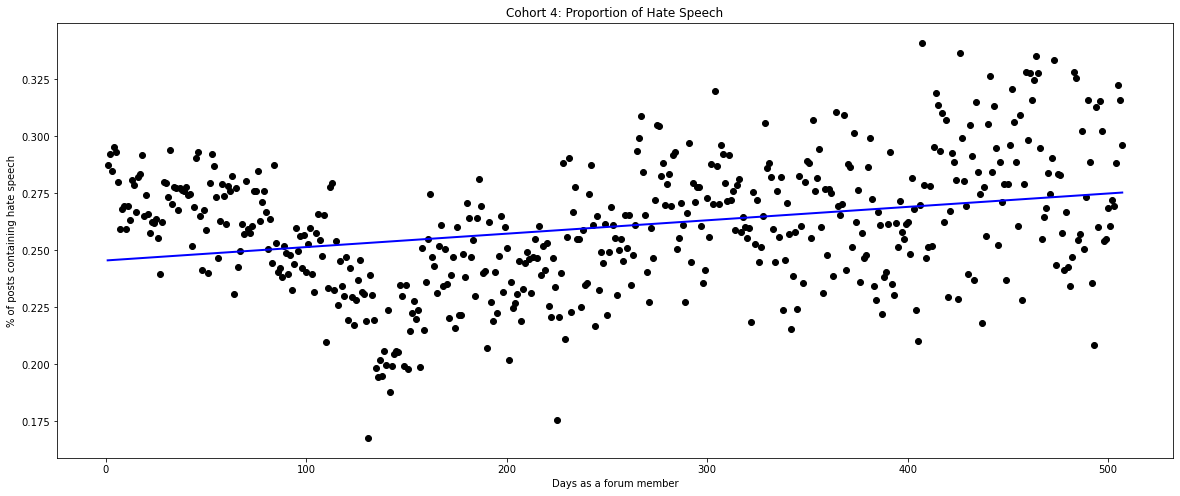

In [25]:
X = C44['age'].values[0:].reshape(-1, 1)
y = C44['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 4: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is 0.0001218984875558865 and the intercept is 0.25782478516783786


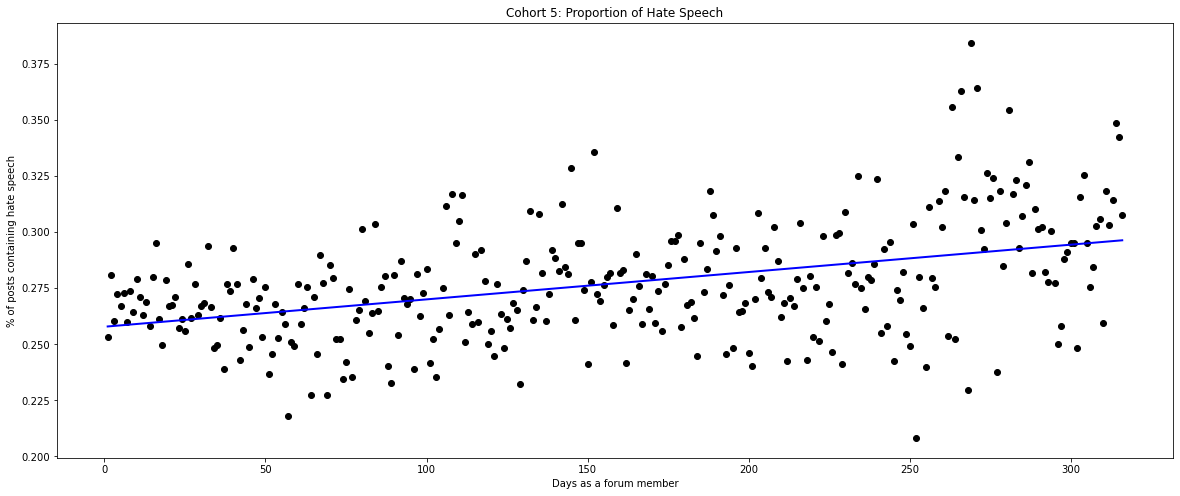

In [26]:
X = C55['age'].values[0:].reshape(-1, 1)
y = C55['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 5: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is -4.033444494849864e-05 and the intercept is 0.2719000808614308


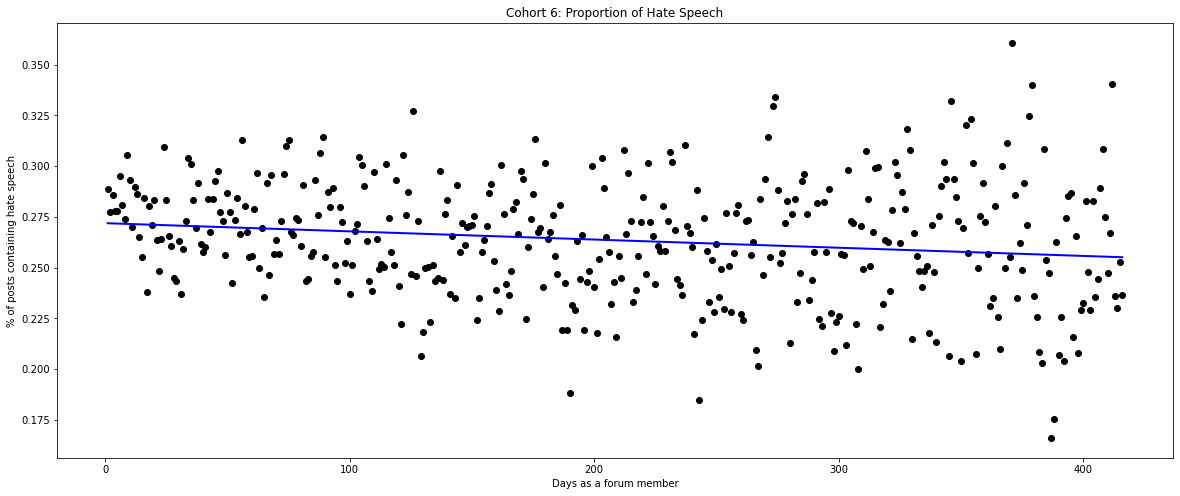

In [27]:
X = C66['age'].values[0:].reshape(-1, 1)
y = C66['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 6: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is -9.891533981881845e-05 and the intercept is 0.30783064908122576


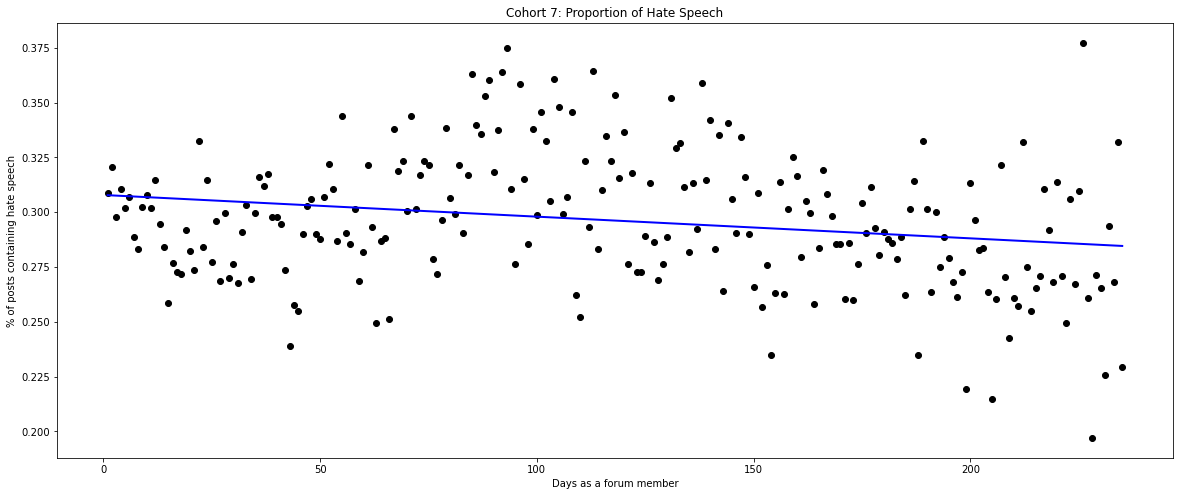

In [28]:
X = C77['age'].values[0:].reshape(-1, 1)
y = C77['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 7: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is -0.00015005541689629438 and the intercept is 0.31872556337746216


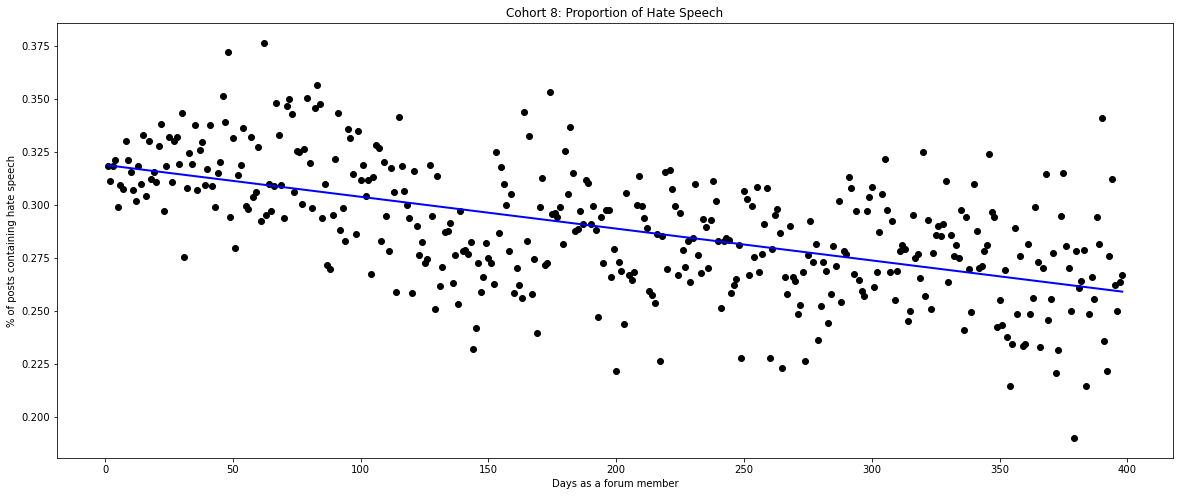

In [31]:
X = C88['age'].values[0:].reshape(-1, 1)
y = C88['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 8: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

The slope is -6.83602428911528e-05 and the intercept is 0.2858394557337054


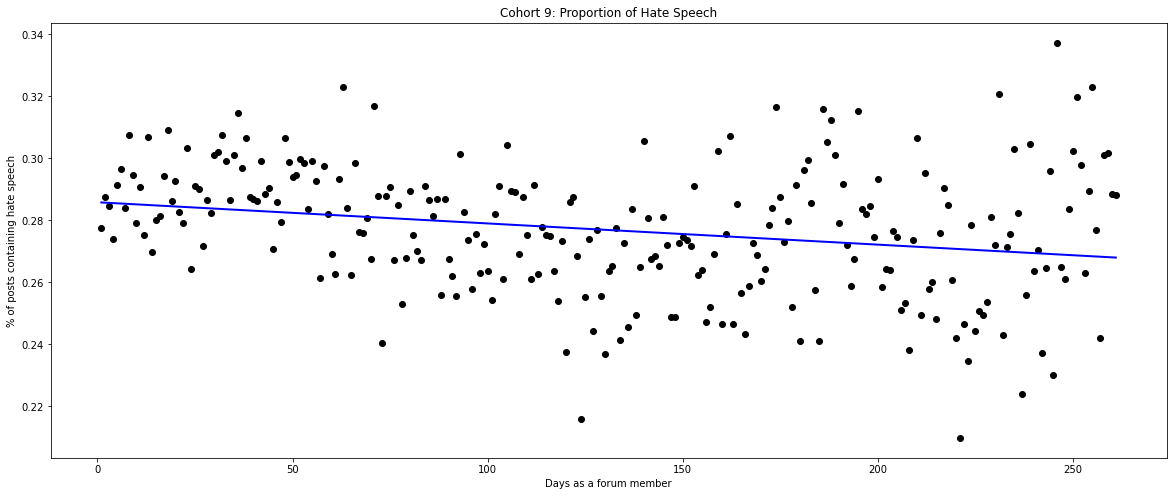

In [30]:
X = C99['age'].values[0:].reshape(-1, 1)
y = C99['prop'].values[0:].reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")
predictions = reg.predict(X.reshape(-1, 1))
plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)

plt.title('Cohort 9: Proportion of Hate Speech');
plt.ylabel('% of posts containing hate speech');
plt.xlabel('Days as a forum member');
plt.show()

## Most Active Users

In [35]:
#soting by posters with > 20k posts
df_user = df_combined.groupby('user_name')['binary_target'].agg(['sum', 'count'])
df_user['prop'] = df_user['sum'] / df_user['count']
df_user = df_user[df_user['count'] > 20000] 
df_user

,sum,count,prop
user_name,,,
Copexodius Maximus,5736,20806,0.275690
Deleted member 23682,4653,24385,0.190814
Mainländer,8242,24262,0.339708
PPEcel,5104,20976,0.243326
RREEEEEEEEE,8351,25471,0.327863
Transcended Trucel,7908,20679,0.382417


## New Entrants

<ipython-input-33-f90c0f369f1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_users['date_joined'] = pd.to_datetime(unique_users['date_joined'] )
<ipython-input-33-f90c0f369f1b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_users['join_month'] = unique_users['date_joined'].dt.to_period('M')


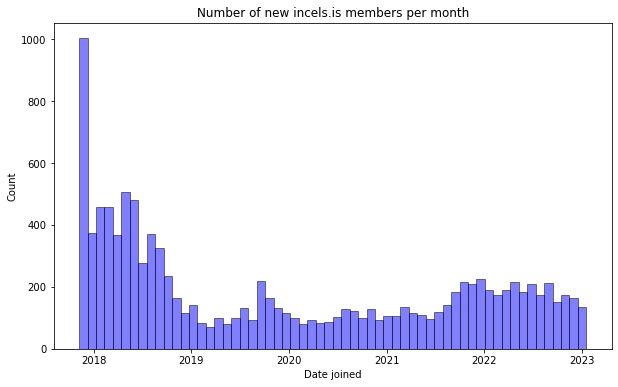

In [33]:
#plotting new entrants each month 
#line plot representes cumulative membership

unique_users = df_combined.drop_duplicates(subset=['user_name'])

unique_users['date_joined'] = pd.to_datetime(unique_users['date_joined'] )
unique_users['join_month'] = unique_users['date_joined'].dt.to_period('M')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.hist(unique_users['date_joined'], bins=60, alpha=0.5, color='blue', edgecolor='black')
ax1.set_xlabel('Date joined')
ax1.set_ylabel('Count')
ax1.set_title('Number of new incels.is members per month')

#ax2 = ax1.twinx()

#df_line = unique_users.groupby('date_joined').size().cumsum().reset_index(name='cumulative_count')
#ax2.plot(df_line['date_joined'], df_line['cumulative_count'], color='red', linewidth=2)
#ax2.set_ylabel('Cumulative count')

plt.show()
